## THE OBJECTIVE OF THIS STUDY IS TO PREDICT WHETHER A PERSON WILL SUBSCRIBE FOR A TERM DEPOSIT OR NOT

### A. Objective of a bank
The objective of a bank is to undertake a telemarketing campaign to attract clients to subscribe for term-deposit and the campaign should be economically feasible. The first step will be to identify prospective clients who are more likely to subscribe for the term-deposit. Inorder to identify the outcome, we need to predict whether a client contacted under this campaign will subscribe or not i.e.(Yes/No as (1/0)) based on historical data where such similar campaign was undertaken.

For each observation, four different events can occur when we try to predict:
- case 1: predicted as 1 which are actually 1. Also known as True Positives.
- case 2: predicted as 1 which are actually 0. Also known as False Positives.Also known as Type I error.
- case 3: predicted as 0 which are actually 0. Also known as True Negatives.
- case 4: predicted as 0 which are actually 1. Also known as False Negatives.Also known as Type II error.

From the perspective of a bank,the cost of this campaign for each call made is C dollars. And the revenue earned for  each call where the client subscribes is R dollars. Assuming that R = 2C.so the payoff for a call under each of the cases are:
- case 1: R-C
- case 2: -C
- case 3: 0
- case 4: -(R-C)

So the best case scenario is not only to increase the term-deposit subscriber base but also to undertake this campaign such that the cost of this campaign do not outweigh the economic benefit i.e. a bank would like to undertake this campaign to a scale where it will not have an operating loss. In order to do so the bank need a model which can identify case 1 with greater accuracy.To reduce  instances for case 2(Type I error) as making a call will not result in subscription. we also need to reduce case 4(Type II error) so that the opportunity cost of loosing out of prospective client is minimized. 

### B. Purpose of the model
To meet the objective of a bank we need to select a model that fits the data well.Following are the steps that will be considered:
- To arrange the dataset into training set and testing set.
- To fit and predict on different class of models.
- To measure different evaluation metrics inorder to identify the best model.
- Select the set of models which have higher precision score. For these models, change the cut-off class probability criterion such that Type II error can be reduced at the cost of Type I error until the precision score for category '1' comes close to .50 which means a bank will have zero-profit situation from this campaign. 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import csv file into pandas
data = pd.read_csv('bank-additional-full.csv',sep = ';')
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [3]:
# variable information of this dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

### II. Preprocessing of data

In this section, i will perform the following preprocessing steps
- To change the variables from string to dummy variable. Along with that i'm grouping the number of distinct items in the variables.
- To remove unknown group in selected variables.
- To dentify the relevant independent variables based on their correlation with the dependent variable.Also    drop the features which has high degree of collinearity with other.I did it manually as the number of features are small. Similar objective can be achieved using SelectKBest and pca procedure.
- To scale the data which has a slewed distribution.It is important for distance-based classifier such as KNN and SVC 

In [4]:
# To modify the names of the variables in the dataset

#To modify variable job
data = data.replace({'job':['admin.','blue-collar','technician','services','management','retired','entrepreneur',
                           'self-employed','housemaid','unemployed','student','unknown']}  
,{'job':['employed','employed','employed','employed','employed','employed','employed',
                           'employed','employed','unemployed','unemployed','unemployed']})
data.job.value_counts()
d1 = pd.get_dummies(data['job'])
d1

data1 = pd.concat([data, d1], axis=1)      
data1.drop(['job','unemployed'], inplace=True, axis=1)
data1.head()

#To modify variable marital
data1 = data1.replace({'marital':['married','single','divorced','unknown']}  
,{'marital':['married','unmarried','unmarried','unmarried']})
data1.marital.value_counts()
d1 = pd.get_dummies(data1['marital'])
d1

data2 = pd.concat([data1, d1], axis=1)      
data2.drop(['marital','unmarried'], inplace=True, axis=1)
data2.head()

#To modify variable education
data2 = data2.replace({'education':['university.degree','high.school','basic.9y','professional.course'
                                   ,'basic.4y','basic.6y','unknown','illiterate']}  
,{'education':['university','non-university','non-university','non-university'
                                   ,'non-university','non-university','non-university','non-university']})
d1 = pd.get_dummies(data2['education'])
d1

data3 = pd.concat([data2, d1], axis=1)      
data3.drop(['education','non-university'], inplace=True, axis=1)

In [5]:
data4 = data3[(data3.housing != 'unknown')&(data3.loan != 'unknown')&(data3.default != 'unknown')]
data4.default.value_counts()

#To get dummy for default
data4 = data4.replace({'default':['yes','no']}  
,{'default':['yes','no_default']})
d1 = pd.get_dummies(data4['default'])
d1
data1 = pd.concat([data4, d1], axis=1)      
data1.drop(['default','yes'], inplace=True, axis=1)

#To get dummy for housing
data1 = data1.replace({'housing':['yes','no']}  
,{'housing':['yes','no_housing']})
d1 = pd.get_dummies(data1['housing'])
d1
data2 = pd.concat([data1, d1], axis=1)      
data2.drop(['housing','yes'], inplace=True, axis=1)

#To get dummy for loan
data2 = data2.replace({'loan':['yes','no']}  
,{'loan':['yes','no_loan']})
d1 = pd.get_dummies(data2['loan'])
d1
data3 = pd.concat([data2, d1], axis=1)      
data3.drop(['loan','yes'], inplace=True, axis=1)


In [6]:
# To add dummy for 'day of the week' variable
d1 = pd.get_dummies(data3['day_of_week'])
d1
data1 = pd.concat([data3, d1], axis=1)      
data1.drop(['day_of_week','fri'], inplace=True, axis=1)
data1.head()

# To add dummy for 'outcome of previous campaign' variable
d1 = pd.get_dummies(data1['poutcome'])
d1
data2 = pd.concat([data1, d1], axis=1)      
data2.drop(['poutcome','failure'], inplace=True, axis=1)
data2.head()

,age,contact,month,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,university,no_default,no_housing,no_loan,mon,thu,tue,wed,nonexistent,success
0,56,telephone,may,261,1,999,0,1.1,93.994,-36.4,...,0,1,1,1,1,0,0,0,1,0
2,37,telephone,may,226,1,999,0,1.1,93.994,-36.4,...,0,1,0,1,1,0,0,0,1,0
3,40,telephone,may,151,1,999,0,1.1,93.994,-36.4,...,0,1,1,1,1,0,0,0,1,0
4,56,telephone,may,307,1,999,0,1.1,93.994,-36.4,...,0,1,1,0,1,0,0,0,1,0
6,59,telephone,may,139,1,999,0,1.1,93.994,-36.4,...,0,1,1,1,1,0,0,0,1,0


In [29]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31828 entries, 0 to 41187
Data columns (total 20 columns):
age               31828 non-null int64
campaign          31828 non-null int64
pdays             31828 non-null int64
previous          31828 non-null int64
cons.price.idx    31828 non-null float64
cons.conf.idx     31828 non-null float64
euribor3m         31828 non-null float64
y                 31828 non-null int32
employed          31828 non-null float64
married           31828 non-null float64
university        31828 non-null float64
no_default        31828 non-null float64
no_housing        31828 non-null float64
no_loan           31828 non-null float64
mon               31828 non-null float64
thu               31828 non-null float64
tue               31828 non-null float64
wed               31828 non-null float64
nonexistent       31828 non-null float64
success           31828 non-null float64
dtypes: float64(15), int32(1), int64(4)
memory usage: 5.0 MB


In [8]:
from sklearn.preprocessing import LabelEncoder
# Discreet value integer encoder
label_encoder = LabelEncoder()
## To change the variable from string to integer values
for heading in ('y'):
    data2[heading] = label_encoder.fit_transform(data2[heading])   
    
data2.y.value_counts()

0    27727
1     4101
dtype: int64

In [10]:
data2.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,university,no_default,no_housing,no_loan,mon,thu,tue,wed,nonexistent,success
age,1.000000,0.006673,-0.003552,-0.047451,0.045727,-0.050516,-0.037416,0.128179,-0.036070,-0.063312,...,-0.055680,-0.002952,-0.001855,0.010697,0.017644,-0.016345,0.017335,-0.021746,-0.040143,0.048523
duration,0.006673,1.000000,-0.069414,-0.049664,0.022038,-0.024539,0.011985,-0.008426,-0.030549,-0.042165,...,-0.014160,0.005820,0.005556,-0.006590,-0.024661,0.019383,0.001502,0.016659,-0.012995,0.047409
campaign,-0.003552,-0.069414,1.000000,0.055095,-0.081586,0.157996,0.126974,-0.015297,0.141503,0.149157,...,0.003045,0.004247,0.010645,-0.007080,0.012115,0.010519,-0.027307,-0.021348,0.090356,-0.053799
pdays,-0.047451,-0.049664,0.055095,1.000000,-0.595253,0.270975,0.066006,-0.104194,0.299676,0.375674,...,-0.028634,-0.002097,0.008941,-0.001108,0.002393,-0.008347,-0.006949,0.000384,0.504749,-0.951058
previous,0.045727,0.022038,-0.081586,-0.595253,1.000000,-0.403229,-0.170472,-0.022335,-0.441080,-0.492733,...,0.015514,-0.002462,-0.021801,0.002590,-0.002052,0.003481,0.002669,-0.004924,-0.873080,0.531284
emp.var.rate,-0.050516,-0.024539,0.157996,0.270975,-0.403229,1.000000,0.765002,0.142321,0.969109,0.899383,...,-0.024492,-0.005896,0.059090,0.000403,-0.021274,-0.007439,0.008832,0.032634,0.455426,-0.256558
cons.price.idx,-0.037416,0.011985,0.126974,0.066006,-0.170472,0.765002,1.000000,0.015546,0.664338,0.484643,...,-0.070913,0.002674,0.077684,0.003943,0.001244,-0.016146,-0.003979,0.017495,0.275394,-0.064205
cons.conf.idx,0.128179,-0.008426,-0.015297,-0.104194,-0.022335,0.142321,0.015546,1.000000,0.229120,0.061613,...,0.076537,-0.005056,0.036028,0.019042,-0.040324,-0.026632,0.048067,0.020374,0.066764,0.096610
euribor3m,-0.036070,-0.030549,0.141503,0.299676,-0.441080,0.969109,0.664338,0.229120,1.000000,0.944819,...,-0.013792,-0.006779,0.058593,0.002468,-0.027324,-0.013580,0.017906,0.036322,0.474201,-0.283816
nr.employed,-0.063312,-0.042165,0.149157,0.375674,-0.492733,0.899383,0.484643,0.061613,0.944819,1.000000,...,-0.015154,-0.007342,0.044660,-0.003246,-0.022305,-0.003468,0.006368,0.029669,0.483251,-0.354235


From the correlation matrix presented above, we can drop the variables which has a correlation value of less than .02 with y as it doenot have enough influence the outcome. There is a need to drop variable 'duration' as it is an ex-post variable and cannot be determined before the call is being made to a particular potential customer. Also the variable 'emp.var.rate' and 'nr.employed' need to be dropped as it has very high collinearity with variable related to euribor3m.

##### II.a) Dropping and separating non-scaled data into label and features

In [11]:
# Drop some columns from dataframe
data2 = data2.drop(['emp.var.rate','duration','month','nr.employed','contact'],axis = 1, inplace= False)

# to seperate the dependent and independent variable
y = data2['y'].as_matrix().astype(np.int)
print(y.shape)


print('There are {} instances for subscription and {} instances for non-subscription.'.format(y.sum(), y.shape[0] - y.sum()))
print('Ratio of subscription over all cases: {:.2f}'.format(float(y.sum()) / y.shape[0]))

y

(31828,)
There are 4101 instances for subscription and 27727 instances for non-subscription.
Ratio of subscription over all cases: 0.13


array([0, 0, 0, ..., 0, 1, 0])

In [12]:
data4 = data2.drop(['y'],axis = 1, inplace= False)
data4.head()

X = data4.as_matrix().astype(np.float)
X.shape
X

array([[  56.,    1.,  999., ...,    0.,    1.,    0.],
       [  37.,    1.,  999., ...,    0.,    1.,    0.],
       [  40.,    1.,  999., ...,    0.,    1.,    0.],
       ..., 
       [  56.,    2.,  999., ...,    0.,    1.,    0.],
       [  44.,    1.,  999., ...,    0.,    1.,    0.],
       [  74.,    3.,  999., ...,    0.,    0.,    0.]])

##### II.b)Dropping and selecting scaled data

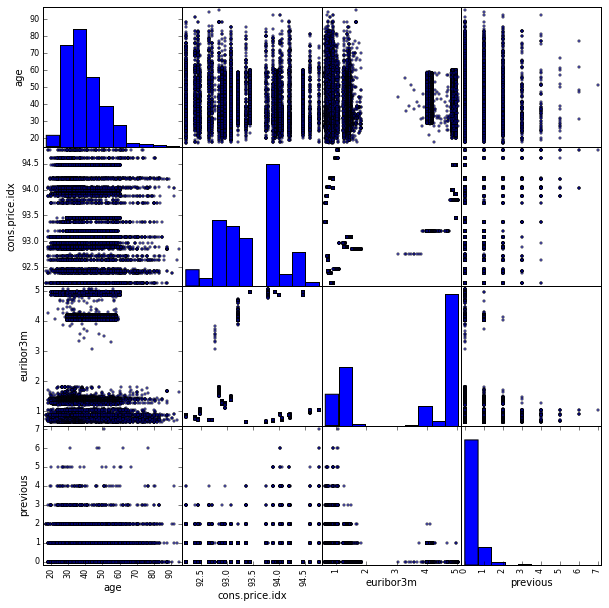

In [30]:
from pandas.tools.plotting import scatter_matrix

X1 = data2[['age','cons.price.idx','euribor3m','previous']]
ax = scatter_matrix(X1, alpha=0.6,figsize=(10, 10), diagonal='hist')

In [13]:
data1 = data2.copy()
# rescaling the dataset
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

for scaling in ('age','cons.price.idx','euribor3m','previous'):
    data1[scaling] = standard_scaler.fit_transform(data1[scaling])
    
data1.head()

C:\Users\sayan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:498: UserWarning: StandardScaler assumes floating point values as input, got int64
  "got %s" % (estimator, X.dtype))


,age,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,y,employed,married,university,no_default,no_housing,no_loan,mon,thu,tue,wed,nonexistent,success
0,1.608150,1,999,-0.373512,0.798878,-36.4,0.790167,0,1,1,0,1,1,1,1,0,0,0,1,0
2,-0.204943,1,999,-0.373512,0.798878,-36.4,0.790167,0,1,1,0,1,0,1,1,0,0,0,1,0
3,0.081335,1,999,-0.373512,0.798878,-36.4,0.790167,0,1,1,0,1,1,1,1,0,0,0,1,0
4,1.608150,1,999,-0.373512,0.798878,-36.4,0.790167,0,1,1,0,1,1,0,1,0,0,0,1,0
6,1.894428,1,999,-0.373512,0.798878,-36.4,0.790167,0,1,1,0,1,1,1,1,0,0,0,1,0


In [14]:
# Drop some columns from dataframe
#data3 = data1.drop(['emp.var.rate','day_of_week','duration','loan','housing','month','nr.employed','contact'],axis = 1, inplace= False)

# to seperate the dependent and independent variable
y1 = data2['y'].as_matrix().astype(np.int)
print(y1.shape)


print('There are {} instances for subscription and {} instances for non-subscription.'.format(y1.sum(), y1.shape[0] - y1.sum()))
print('Ratio of subscription over all cases: {:.2f}'.format(float(y1.sum()) / y1.shape[0]))

y1

(31828,)
There are 4101 instances for subscription and 27727 instances for non-subscription.
Ratio of subscription over all cases: 0.13


array([0, 0, 0, ..., 0, 1, 0])

In [15]:
data3 = data1.drop(['y'],axis = 1, inplace= False)
data3.head()

X1 = data3.as_matrix().astype(np.float)
X1.shape
X1

array([[  1.60814993e+00,   1.00000000e+00,   9.99000000e+02, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [ -2.04943355e-01,   1.00000000e+00,   9.99000000e+02, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  8.13345328e-02,   1.00000000e+00,   9.99000000e+02, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       ..., 
       [  1.60814993e+00,   2.00000000e+00,   9.99000000e+02, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  4.63038383e-01,   1.00000000e+00,   9.99000000e+02, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  3.32581726e+00,   3.00000000e+00,   9.99000000e+02, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

### III. Model selection

This project is a part of supervised learning. The following steps are followed:
- Training and Testing of dataset: Cross-Validation,Stratified K-fold CV
- Classifiers: Logistic Regression, Multinomial Naive Bayes, Decision Tree, Random Forest, K-Nearest Neighbor, Support Vector Classfier.
- model evaluation metric: accuracy,precision,recall,f1-score,mean-squared error

Evaluating the performance of a model by training and testing on the same dataset can lead to overfitting.Hence model evaluation is based on splitting the dataset into train and validation set.But the performance of the prediction result depends upon the random choice of the pair of (train,validation) set. Inorder to overcome such shortcomming, Cross-Validation procedure is used where a under the k-fold CV approach, the training set is split into k smaller sets, where a model is trained using k-1 of the folds as training data and the model is validated on the remaining part. Also dataset can be split according to different cross-validation strategy namely: k-fold and Stratified k-fold. Stratified k-fold is a variation of k-fold where each set contains approximately the same percentage of samples of each target class as the complete set.As the dataset for this project is highly unbalanced, i will compare different CV strategies to evaluate the performance of the model.

In [16]:
from sklearn.cross_validation import StratifiedKFold,train_test_split
from sklearn.cross_validation import cross_val_score,cross_val_predict
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error

### A.Logistic Regression

#### Alternative 1:

In [112]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

y_pred = cross_val_predict(logreg,X,y,cv=10)
print('Logistic Regression - accuracy score:{:.2f}'.format(accuracy_score(y, y_pred)))
print(                                                                               )
logreg_conf_matrix = confusion_matrix(y, y_pred)
print('Logistic Regression - confusion matrix:\n {}\n'.format(logreg_conf_matrix))
print(                                                                               )
logreg_class_report = classification_report(y, y_pred)
print('Logistic Regression - classification report:\n {}\n'.format(logreg_class_report))

mse = mean_squared_error(y,y_pred)
rmse = np.sqrt(mse)
print('Logistic Regression - mean-squared error:\n {}\n'.format(rmse))



Logistic Regression - accuracy score:0.83

Logistic Regression - confusion matrix:
 [[25424  2303]
 [ 3191   910]]


Logistic Regression - classification report:
              precision    recall  f1-score   support

          0       0.89      0.92      0.90     27727
          1       0.28      0.22      0.25      4101

avg / total       0.81      0.83      0.82     31828


Logistic Regression - mean-squared error:
 0.41546998360484694



#### Alternative 2:

In [113]:
def stratifiedkfold_cv(X, y, clf_class, shuffle=True, n_folds=10, **kwargs):
    stratifiedk_fold = StratifiedKFold(y, n_folds=n_folds, shuffle=shuffle)
    y_pred = y.copy()
    for train_index, test_index in stratifiedk_fold:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
    return y_pred

In [114]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression

y_pred = stratifiedkfold_cv(X, y,logreg)

print('Logistic Regression - accuracy score:{:.2f}'.format(accuracy_score(y, y_pred)))
print(                                                                               )
logreg_conf_matrix = confusion_matrix(y, y_pred)
print('Logistic Regression - confusion matrix:\n {}\n'.format(logreg_conf_matrix))
print(                                                                               )
logreg_class_report = classification_report(y, y_pred)
print('Logistic Regression - classification report:\n {}\n'.format(logreg_class_report))

mse = mean_squared_error(y,y_pred)
rmse = np.sqrt(mse)
print('Logistic Regression - mean-squared error:\n {}\n'.format(rmse))

Logistic Regression - accuracy score:0.88

Logistic Regression - confusion matrix:
 [[27294   433]
 [ 3232   869]]


Logistic Regression - classification report:
              precision    recall  f1-score   support

          0       0.89      0.98      0.94     27727
          1       0.67      0.21      0.32      4101

avg / total       0.86      0.88      0.86     31828


Logistic Regression - mean-squared error:
 0.3393378585266953



In [115]:
# to adjust the probability cutoff for accepting y = 1 given x = 0, 
logreg = LogisticRegression()
logreg = logreg.fit(X,y)

probs = logreg.predict_proba(X)

print('Logistic Regression - coefficient values:\n {}\n'.format(logreg.coef_))

print('Logistic Regression - predicted probabilities:\n {}\n'.format(logreg.predict_proba(X)))

Logistic Regression - coefficient values:
 [[ 0.00766145 -0.05251121 -0.00175581  0.11341577  0.02336769  0.03576539
  -0.49995832 -0.34066624 -0.11968877  0.21307949 -0.07254543  0.01160575
   0.02130348 -0.13559974  0.12607068  0.10103556  0.18197862  0.65713955
   0.25887912]]

Logistic Regression - predicted probabilities:
 [[ 0.95100098  0.04899902]
 [ 0.95782705  0.04217295]
 [ 0.95640746  0.04359254]
 ..., 
 [ 0.7796745   0.2203255 ]
 [ 0.81827003  0.18172997]
 [ 0.87382153  0.12617847]]



In [116]:
count = []
for prob in probs:
    if prob[1]> .30:
        count.append(1)
    else:
        count.append(0)
        
predict2 = np.array(count)

accuracy_score(y,predict2)

logreg_conf_matrix = confusion_matrix(y, predict2)
print('Logistic Regression - confusion matrix:\n {}\n'.format(logreg_conf_matrix))
print(                                                                               )

logreg_class_report = classification_report(y, predict2)
print('Logistic Regression - classification report:\n {}\n'.format(logreg_class_report))

Logistic Regression - confusion matrix:
 [[26211  1516]
 [ 2560  1541]]


Logistic Regression - classification report:
              precision    recall  f1-score   support

          0       0.91      0.95      0.93     27727
          1       0.50      0.38      0.43      4101

avg / total       0.86      0.87      0.86     31828




It can be seen that an appropriate CV strategy effects the performance of the model not only interms of overall accuracy but also satisfies the objective of this study. The precision metric for class 1 labels is lot better in alternative 2 than in alternative 3.Even if there is a decrease in recall score of alternative 2 by 1 relative to alternative 1, the f1-score is still higher by 20% for alternative 2.

### B.Multinomial Naive Bayes

Though Naive Bayes approach is commonly used for text-classification,i choose to try out Multinomial Naive Bayes(MNB) as from the correlation result the variables selected have low level of correlation. On the other hand MNB classifier do not consider variables with negative value. As a result of that i dropped the variable related to consumer confidence index.

In [119]:
# Drop some columns from dataframe
# need to drop consumer confidence index variable as variable for this classifier cannot be negative
data4 = data2.drop(['cons.conf.idx','y'],axis = 1, inplace= False)
data4.head()
X = data4.as_matrix().astype(np.float)
X.shape
X

array([[  56.,    1.,  999., ...,    0.,    1.,    0.],
       [  37.,    1.,  999., ...,    0.,    1.,    0.],
       [  40.,    1.,  999., ...,    0.,    1.,    0.],
       ..., 
       [  56.,    2.,  999., ...,    0.,    1.,    0.],
       [  44.,    1.,  999., ...,    0.,    1.,    0.],
       [  74.,    3.,  999., ...,    0.,    0.,    0.]])

#### Alternative 1:

In [120]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

y_pred = cross_val_predict(mnb,X,y,cv=10)
print('Multinomial NB - accuracy score:{:.2f}'.format(accuracy_score(y, y_pred)))
print(                                                                               )
logreg_conf_matrix = confusion_matrix(y, y_pred)
print('Multinomial NB - confusion matrix:\n {}\n'.format(logreg_conf_matrix))
print(                                                                               )
logreg_class_report = classification_report(y, y_pred)
print('Multinomial NB - classification report:\n {}\n'.format(logreg_class_report))

mse = mean_squared_error(y,y_pred)
rmse = np.sqrt(mse)
print('Multinomial NB - mean-squared error:\n {}\n'.format(rmse))

Multinomial NB - accuracy score:0.87

Multinomial NB - confusion matrix:
 [[26612  1115]
 [ 2947  1154]]


Multinomial NB - classification report:
              precision    recall  f1-score   support

          0       0.90      0.96      0.93     27727
          1       0.51      0.28      0.36      4101

avg / total       0.85      0.87      0.86     31828


Multinomial NB - mean-squared error:
 0.35724428082824733



#### Alternative 2:

In [121]:
def stratifiedkfold_cv(X, y, clf_class, shuffle=True, n_folds=10, **kwargs):
    stratifiedk_fold = StratifiedKFold(y, n_folds=n_folds, shuffle=shuffle)
    y_pred = y.copy()
    for train_index, test_index in stratifiedk_fold:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
    return y_pred 

In [122]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB

y_pred = stratifiedkfold_cv(X, y,mnb)

print('Multinomial NB - accuracy score:{:.2f}'.format(accuracy_score(y, y_pred)))
print(                                                                               )
logreg_conf_matrix = confusion_matrix(y, y_pred)
print('Multinomial NB - confusion matrix:\n {}\n'.format(logreg_conf_matrix))
print(                                                                               )
logreg_class_report = classification_report(y, y_pred)
print('Multinomial NB - classification report:\n {}\n'.format(logreg_class_report))

mse = mean_squared_error(y,y_pred)
rmse = np.sqrt(mse)
print('Multinomial NB - mean-squared error:\n {}\n'.format(rmse))

Multinomial NB - accuracy score:0.88

Multinomial NB - confusion matrix:
 [[26845   882]
 [ 2967  1134]]


Multinomial NB - classification report:
              precision    recall  f1-score   support

          0       0.90      0.97      0.93     27727
          1       0.56      0.28      0.37      4101

avg / total       0.86      0.88      0.86     31828


Multinomial NB - mean-squared error:
 0.3477517153060548



Though there is no difference between the two alternatives interms of accuracy score and recall, alternative 2 has a better precision score by 10% relative to alternative 1. Hence alternative 2 will better of the two.

### Decision Tree Classifier

#### Alternative 1

In [129]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(min_samples_split = 280)

y_pred = cross_val_predict(DT,X,y,cv=10)
print('DT - accuracy score:{:.2f}'.format(accuracy_score(y, y_pred)))
print(                                                                               )
logreg_conf_matrix = confusion_matrix(y, y_pred)
print('DT - confusion matrix:\n {}\n'.format(logreg_conf_matrix))
print(                                                                               )
logreg_class_report = classification_report(y, y_pred)
print('DT - classification report:\n {}\n'.format(logreg_class_report))

mse = mean_squared_error(y,y_pred)
rmse = np.sqrt(mse)
print('DT - mean-squared error:\n {}\n'.format(rmse))

DT - accuracy score:0.37

DT - confusion matrix:
 [[11062 16665]
 [ 3529   572]]


DT - classification report:
              precision    recall  f1-score   support

          0       0.76      0.40      0.52     27727
          1       0.03      0.14      0.05      4101

avg / total       0.66      0.37      0.46     31828


DT - mean-squared error:
 0.7965380036463953



#### Alternative 2

In [132]:
def stratifiedkfold_cv(X, y, clf_class, shuffle=True, n_folds=10, **kwargs):
    stratifiedk_fold = StratifiedKFold(y, n_folds=n_folds, shuffle=shuffle)
    y_pred = y.copy()
    for train_index, test_index in stratifiedk_fold:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
    return y_pred

In [133]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier

y_pred = stratifiedkfold_cv(X, y,DT,min_samples_split = 280)

print('Decision Tree - accuracy score:{:.2f}'.format(accuracy_score(y, y_pred)))
print(                                                                               )
logreg_conf_matrix = confusion_matrix(y, y_pred)
print('Decision Tree - confusion matrix:\n {}\n'.format(logreg_conf_matrix))
print(                                                                               )
logreg_class_report = classification_report(y, y_pred)
print('Decision Tree - classification report:\n {}\n'.format(logreg_class_report))

mse = mean_squared_error(y,y_pred)
rmse = np.sqrt(mse)

print('Decision Tree - mean-squared error:\n {}\n'.format(rmse))

Decision Tree - accuracy score:0.89

Decision Tree - confusion matrix:
 [[27161   566]
 [ 3039  1062]]


Decision Tree - classification report:
              precision    recall  f1-score   support

          0       0.90      0.98      0.94     27727
          1       0.65      0.26      0.37      4101

avg / total       0.87      0.89      0.86     31828


Decision Tree - mean-squared error:
 0.33654873293748233



It seems that the performance of a decision tree model varies largely by cross-validation strategy. Alternative 2 is better in all evaluation metrics

In [134]:
# to adjust the probability cutoff for accepting y = 1 given x = 0, 
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(min_samples_split = 280)
DT = DT.fit(X,y)

probs = DT.predict_proba(X)

print('DT - predicted probabilities:\n {}\n'.format(DT.predict_proba(X)))

DT - predicted probabilities:
 [[ 0.96446701  0.03553299]
 [ 1.          0.        ]
 [ 1.          0.        ]
 ..., 
 [ 0.59302326  0.40697674]
 [ 0.59302326  0.40697674]
 [ 0.59302326  0.40697674]]



In [137]:
count = []
for prob in probs:
    if prob[1]> .305:
        count.append(1)
    else:
        count.append(0)
        
predict2 = np.array(count)

accuracy_score(y,predict2)

dt_conf_matrix = confusion_matrix(y, predict2)
print('DT - confusion matrix:\n {}\n'.format(dt_conf_matrix))
print(                                                                               )

dt_class_report = classification_report(y, predict2)
print('DT - classification report:\n {}\n'.format(dt_class_report))

DT - confusion matrix:
 [[25419  2308]
 [ 1836  2265]]


DT - classification report:
              precision    recall  f1-score   support

          0       0.93      0.92      0.92     27727
          1       0.50      0.55      0.52      4101

avg / total       0.88      0.87      0.87     31828




In [58]:
#not getting the tree diagram

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt = dt.fit(X,y)

from sklearn import tree
from sklearn.externals.six import StringIO
with open('dt.dot','w') as f:
    f = tree.export_graphviz(dt,out_file = f)         

### Random Forest Classifier

Random Forest Classifier is based on an ensemble learning method for classification that fits a specified number of multiple decision trees and use it improve the predictive accuracy and control over-fitting.  

#### Alternative 1

In [24]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 18)

y_pred = cross_val_predict(RFC,X,y,cv=10)
print('RFC - accuracy score:{:.2f}'.format(accuracy_score(y, y_pred)))
print(                                                                               )
logreg_conf_matrix = confusion_matrix(y, y_pred)
print('RFC - confusion matrix:\n {}\n'.format(logreg_conf_matrix))
print(                                                                               )
logreg_class_report = classification_report(y, y_pred)
print('RFC - classification report:\n {}\n'.format(logreg_class_report))

mse = mean_squared_error(y,y_pred)
rmse = np.sqrt(mse)
print('RFC - mean-squared error:\n {}\n'.format(rmse))


RFC - accuracy score:0.34

RFC - confusion matrix:
 [[10441 17286]
 [ 3653   448]]


RFC - classification report:
              precision    recall  f1-score   support

          0       0.74      0.38      0.50     27727
          1       0.03      0.11      0.04      4101

avg / total       0.65      0.34      0.44     31828


RFC - mean-squared error:
 0.8110979313353063



#### Alternative 2:


In [18]:
def stratifiedkfold_cv(X, y, clf_class, shuffle=True, n_folds=10, **kwargs):
    stratifiedk_fold = StratifiedKFold(y, n_folds=n_folds, shuffle=shuffle)
    y_pred = y.copy()
    for train_index, test_index in stratifiedk_fold:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
    return y_pred

In [19]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier

y_pred = stratifiedkfold_cv(X, y, RFC,random_state=1234)
print('Random Forest - accuracy score:{:.2f}'.format(accuracy_score(y, y_pred)))
print(                                                                               )
logreg_conf_matrix = confusion_matrix(y, y_pred)
print('Random Forest - confusion matrix:\n {}\n'.format(logreg_conf_matrix))
print(                                                                               )
logreg_class_report = classification_report(y, y_pred)
print('Random Forest - classification report:\n {}\n'.format(logreg_class_report))

mse = mean_squared_error(y,y_pred)
rmse = np.sqrt(mse)
print('Random Forest - mean-squared error:\n {}\n'.format(rmse))

Random Forest - accuracy score:0.87

Random Forest - confusion matrix:
 [[26437  1290]
 [ 2917  1184]]


Random Forest - classification report:
              precision    recall  f1-score   support

          0       0.90      0.95      0.93     27727
          1       0.48      0.29      0.36      4101

avg / total       0.85      0.87      0.85     31828


Random Forest - mean-squared error:
 0.3635645929836037



#### Alternative 3:

In [23]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier

y_pred = stratifiedkfold_cv(X, y, RFC,n_estimators = 18)
print('Random Forest - accuracy score:{:.2f}'.format(accuracy_score(y, y_pred)))
print(                                                                               )
logreg_conf_matrix = confusion_matrix(y, y_pred)
print('Random Forest - confusion matrix:\n {}\n'.format(logreg_conf_matrix))
print(                                                                               )
logreg_class_report = classification_report(y, y_pred)
print('Random Forest - classification report:\n {}\n'.format(logreg_class_report))

mse = mean_squared_error(y,y_pred)
rmse = np.sqrt(mse)
print('Random Forest - mean-squared error:\n {}\n'.format(rmse))

Random Forest - accuracy score:0.87

Random Forest - confusion matrix:
 [[26457  1270]
 [ 2895  1206]]


Random Forest - classification report:
              precision    recall  f1-score   support

          0       0.90      0.95      0.93     27727
          1       0.49      0.29      0.37      4101

avg / total       0.85      0.87      0.85     31828


Random Forest - mean-squared error:
 0.36174524248422724



Similar to Decion Tree model, Random Forest models are very sensitive to cross-validation techniques. And from alternative 2 and alternative 3, it seems that tuning the hyperparameter of Random Forest is more effective in reducing Type I and Type II error.

 ### K- Nearest Neighbor (KNN)

#### Alternative 1

In [146]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier

k_range = range(1,40)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.73776237318010252, 0.83240383674432861, 0.79953381875939755, 0.83765059766000527, 0.82149754106791573, 0.84261522846796066, 0.83378403794113409, 0.84827170251209016, 0.84135745643777127, 0.85012574404677521, 0.8449398718979676, 0.85329936459102007, 0.84949641866896763, 0.85505904681231171, 0.85216754649626658, 0.85801293663357092, 0.85446162212944754, 0.85848436788772153, 0.85502725472388152, 0.85964708947216018, 0.85644140038654215, 0.8603070023934325, 0.85798129264493161, 0.86121836901288495, 0.86011822452672904, 0.86294674293839635, 0.86093529107270439, 0.86366951928421365, 0.86216089582832678, 0.86423515187864752, 0.86404649249177667, 0.86577506388367576, 0.86454927153498495, 0.86649783035617389, 0.86542919163218579, 0.8668120191257469, 0.86546061840779864, 0.86700061927270133, 0.86646627522740882]


In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 38)
y_pred = cross_val_predict(knn,X,y,cv=10)
print('KNN - accuracy score:{:.2f}'.format(accuracy_score(y, y_pred)))
print(                                                                               )
logreg_conf_matrix = confusion_matrix(y, y_pred)
print('KNN - confusion matrix:\n {}\n'.format(logreg_conf_matrix))
print(                                                                               )
logreg_class_report = classification_report(y, y_pred)
print('KNN - classification report:\n {}\n'.format(logreg_class_report))

mse = mean_squared_error(y,y_pred)
rmse = np.sqrt(mse)
print('KNN - mean-squared error:\n {}\n'.format(rmse))

KNN - accuracy score:0.88

KNN - confusion matrix:
 [[35350  1198]
 [ 3673   967]]


KNN - classification report:
              precision    recall  f1-score   support

          0       0.91      0.97      0.94     36548
          1       0.45      0.21      0.28      4640

avg / total       0.85      0.88      0.86     41188


KNN - mean-squared error:
 0.3438932985062404



#### Alternative 2

In [58]:
def stratifiedkfold_cv1(X1, y1, clf_class, shuffle=True, n_folds=10, **kwargs):
    stratifiedk_fold = StratifiedKFold(y1, n_folds=n_folds, shuffle=shuffle)
    y_pred = y1.copy()
    for train_index, test_index in stratifiedk_fold:
        X_train, X_test = X1[train_index], X1[test_index]
        y_train = y1[train_index]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
    return y_pred

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier
k_range = range(1,40)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier
    y1_pred = stratifiedkfold_cv1(X1, y1,knn,n_neighbors = k)
    scores = accuracy_score(y1, y1_pred)
    k_scores.append(scores.mean())
print(k_scores)

[0.83162624104562022, 0.8730677390976499, 0.86807213774035441, 0.87847178584893804, 0.87570692472037204, 0.87950860877215031, 0.87925725776046249, 0.8815508357421139, 0.88048259394244066, 0.88340454945331159, 0.88148799798919186, 0.88324745507100666, 0.88261907754178714, 0.88375015709438232, 0.88419002136483604, 0.88519542541158724, 0.88456704788236773, 0.88563528968204097, 0.88491265552343845, 0.88513258765866532, 0.88528968204097025, 0.88601231619957266, 0.88532110091743121, 0.88513258765866532, 0.88532110091743121, 0.8856981274349629, 0.88494407439989942, 0.88563528968204097, 0.88522684428804821, 0.88604373507603373, 0.88538393867035314, 0.88519542541158724, 0.88535251979389218, 0.8860751539524947, 0.88585522181726783, 0.88591805957018976, 0.88494407439989942, 0.88503833102928242, 0.88544677642327507]


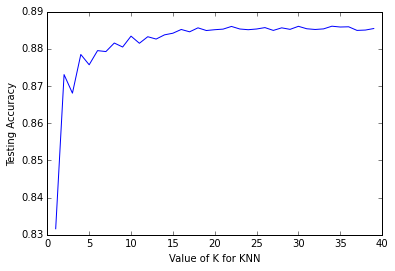

In [27]:
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [28]:
# According to the accuracy score of k with the best possible parameter
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier
y1_pred = stratifiedkfold_cv1(X1, y1,knn,n_neighbors = 28) 
print('K-neighbor - accuracy score:{:.2f}'.format(accuracy_score(y1, y1_pred)))
print(                                                                               )
logreg_conf_matrix = confusion_matrix(y1, y1_pred)
print('K-neighbor - confusion matrix:\n {}\n'.format(logreg_conf_matrix))
print(                                                                               )
logreg_class_report = classification_report(y1, y1_pred)
print('K-neighbor - classification report:\n {}\n'.format(logreg_class_report))

mse = mean_squared_error(y1,y1_pred)
rmse = np.sqrt(mse)
print('K-neighbor - mean-squared error:\n {}\n'.format(rmse))

K-neighbor - accuracy score:0.89

K-neighbor - confusion matrix:
 [[27154   573]
 [ 3067  1034]]


K-neighbor - classification report:
              precision    recall  f1-score   support

          0       0.90      0.98      0.94     27727
          1       0.64      0.25      0.36      4101

avg / total       0.87      0.89      0.86     31828


K-neighbor - mean-squared error:
 0.33817851841587904



Alternative 2 has a better precision score relative to alternative 1

In [59]:
# to adjust the probability cutoff for accepting y = 1 given x = 0, 
knn = KNeighborsClassifier(n_neighbors = 28)
knn = knn.fit(X1,y1)

probs = knn.predict_proba(X1)

print('knn - predicted probabilities:\n {}\n'.format(knn.predict_proba(X1)))

knn - predicted probabilities:
 [[ 0.96428571  0.03571429]
 [ 1.          0.        ]
 [ 1.          0.        ]
 ..., 
 [ 0.5         0.5       ]
 [ 0.46428571  0.53571429]
 [ 0.53571429  0.46428571]]



In [62]:
count = []
for prob in probs:
    if prob[1]> .33:
        count.append(1)
    else:
        count.append(0)
        
predict2 = np.array(count)

accuracy_score(y1,predict2)

knn_conf_matrix = confusion_matrix(y1, predict2)
print('knn - confusion matrix:\n {}\n'.format(knn_conf_matrix))
print(                                                                               )

knn_class_report = classification_report(y1, predict2)
print('knn - classification report:\n {}\n'.format(knn_class_report))

knn - confusion matrix:
 [[26065  1662]
 [ 2448  1653]]


knn - classification report:
              precision    recall  f1-score   support

          0       0.91      0.94      0.93     27727
          1       0.50      0.40      0.45      4101

avg / total       0.86      0.87      0.86     31828




##### Support Vector Classifer (SVC)

#### Alternative 1

In [86]:
from sklearn import svm
SVC = svm.SVC()
y_pred = cross_val_predict(SVC,X1,y1,cv=10)
print('SVC - accuracy score:{:.2f}'.format(accuracy_score(y1, y_pred)))
print(                                                                               )
logreg_conf_matrix = confusion_matrix(y1, y_pred)
print('SVC - confusion matrix:\n {}\n'.format(logreg_conf_matrix))
print(                                                                               )
logreg_class_report = classification_report(y1, y_pred)
print('SVC - classification report:\n {}\n'.format(logreg_class_report))

mse = mean_squared_error(y1,y_pred)
rmse = np.sqrt(mse)
print('SVC - mean-squared error:\n {}\n'.format(rmse))

SVC - accuracy score:0.81

SVC - confusion matrix:
 [[32555  3993]
 [ 3869   771]]


SVC - classification report:
              precision    recall  f1-score   support

          0       0.89      0.89      0.89     36548
          1       0.16      0.17      0.16      4640

avg / total       0.81      0.81      0.81     41188


SVC - mean-squared error:
 0.4368991177369708



#### Alternative 2

In [87]:
def stratifiedkfold_cv1(X1, y1, clf_class, shuffle=True, n_folds=10, **kwargs):
    stratifiedk_fold = StratifiedKFold(y1, n_folds=n_folds, shuffle=shuffle)
    y_pred = y1.copy()
    for train_index, test_index in stratifiedk_fold:
        X_train, X_test = X1[train_index], X1[test_index]
        y_train = y1[train_index]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
    return y_pred

In [88]:
# Estimate predicted values for support vector machines classification model with cross-validation
from sklearn import svm
SVC = svm.SVC

y1_pred = stratifiedkfold_cv1(X1, y1,SVC,kernel = 'linear')
print('SVC - accuracy score:{:.2f}'.format(accuracy_score(y1, y1_pred)))
print(                                                                               )
logreg_conf_matrix = confusion_matrix(y1, y1_pred)
print('SVC - confusion matrix:\n {}\n'.format(logreg_conf_matrix))
print(                                                                               )
logreg_class_report = classification_report(y1, y1_pred)
print('SVC - classification report:\n {}\n'.format(logreg_class_report))

mse = mean_squared_error(y1,y1_pred)
rmse = np.sqrt(mse)
print('SVC - mean-squared error:\n {}\n'.format(rmse))

SVC - accuracy score:0.90

SVC - confusion matrix:
 [[36000   548]
 [ 3673   967]]


SVC - classification report:
              precision    recall  f1-score   support

          0       0.91      0.99      0.94     36548
          1       0.64      0.21      0.31      4640

avg / total       0.88      0.90      0.87     41188


SVC - mean-squared error:
 0.3201270142217528



Alternative 2 performs better than Alternative 1 interms of precision score

### CONCLUSION

Following are the conclusions of the study:
- In case of unbalanced data it is important to use stratified k-fold CV than default CV. The variation in accuracy and other metric scores vary widely for Tree-based models.
- For the purpose of my study, overall accuracy was not of utmost importance. Precision and recall for classification class 1 was also important. In case of Precision metric, Logistic Regression,Decision Tree, K-Nearest Neighborhood, SVC are the best set of models to use. 
- In this study,Recall is also important to increase the subscriber base and as a result of that if some sort of balance in trade-off is required between Type I and Type II error than Decision Tree turns out to be the most appropriate model.    